Importing standard packages

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

Setting display options

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


Importing additional data visualization

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import matplotlib.patches as mpatches

Reading the data

In [5]:
cleaned_activity = pd.read_csv('activity_daily_cleaned.csv')

In [6]:
cleaned_activity.head()

,Unnamed: 0,Unnamed: 0.1,_id,city,clicks,country,device_model,device_type,isp,login_count,purchases_count,subscribers,time,tv_l5min,tv_playtime,user_agent,vod_l5min,vod_playtime,details_acc,details_age,details_app_ver,details_clicks,details_login_count,details_profile,details_purchases_count,details_sex,details_subscribers,details_subscription,details_tv_l5min,details_tv_playtime,details_vod_l5min,details_vod_playtime
0,0,0,5d96a7a683b22e4f71fdaa8b,Gornji Vakuf,0,Bosnia and Herzegovina,android-mobile,smar-tv,Eronet,1,1,1,2019-10-03T00:00:00.000Z,0,18021,Mozilla/5.0,0,6005.0,65957,30.0,2.25,0,1,310927,1,m,1,1,0,18021,0,6005.0
1,3,3,5d96a7a683b22e4f71fdaa8e,Travnik,0,Bosnia and Herzegovina,android-mobile,ios-tablet,Meo,1,1,1,2019-10-03T00:00:00.000Z,0,12187,Mozilla/5.0,0,7308.0,65955,42.0,2.22,0,1,310918,1,m,1,12,0,12187,0,7308.0
2,4,4,5d96a7a683b22e4f71fdaa8f,Porto,0,Portugal,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6...,web,Vodafone Portugal,2,0,1,2019-10-03T00:00:00.000Z,0,0,Google Chrome,0,0.0,72019,29.0,2.29.1,0,2,317977,0,f,1,16,0,0,0,0.0
3,5,5,5d96a7a683b22e4f71fdaa90,Sarajevo,1,Bosnia and Herzegovina,android-mobile,android-tablet,Verizon,20,20,5,2019-10-03T00:00:00.000Z,1,459197,Mozilla/5.0,0,134031.0,66086,27.0,2.24,0,5,311535,5,m,1,1,0,113435,0,35113.0
4,7,7,5d96a7a683b22e4f71fdaa92,Travnik,5,Bosnia and Herzegovina,android-tablet,android-tablet,Meo,30,30,5,2019-10-03T00:00:00.000Z,4,678859,Mozilla/5.0,1,156140.0,66188,14.0,2.24,1,5,312018,5,m,1,15,1,152235,0,29042.0


Data exploratory analysis

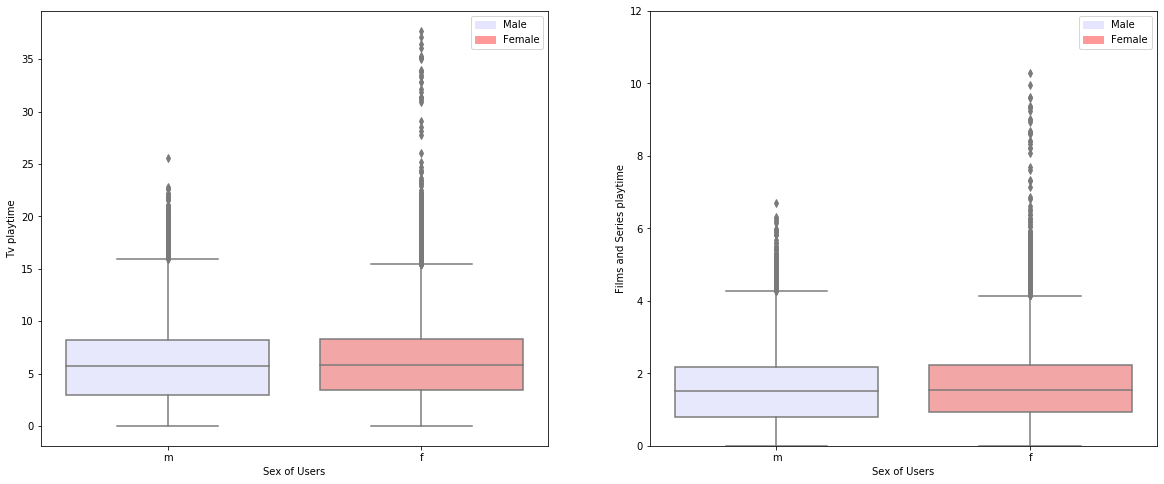

In [7]:
fig = plt.subplots(figsize = (20,8))
plt.subplot(1,2,1)
my_pal = {"m": "#e5e5ff", "f": "#ff9999"}
ax = sns.boxplot(x=cleaned_activity['details_sex'],
                 y=cleaned_activity['tv_playtime']/(60*60*24),
                palette=my_pal
                )
plt.xlabel('Sex of Users')
plt.ylabel("Tv playtime")
red_patch = mpatches.Patch(color='#e5e5ff', label='Male')
blue_patch = mpatches.Patch(color='#ff9999', label='Female')
plt.legend(handles=[red_patch,blue_patch])
plt.subplot(1,2,2)
ax1 = sns.boxplot(x=cleaned_activity['details_sex'],
                 y=cleaned_activity['vod_playtime']/(60*60*24),
                palette=my_pal
                )
plt.xlabel('Sex of Users')
plt.ylabel("Films and Series playtime")
red_patch = mpatches.Patch(color='#e5e5ff', label='Male')
blue_patch = mpatches.Patch(color='#ff9999', label='Female')
ax1.axes.set_ylim(0,12)
plt.legend(handles=[red_patch,blue_patch])

Text(0, 0.5, 'Daily TV playtime in Hours')

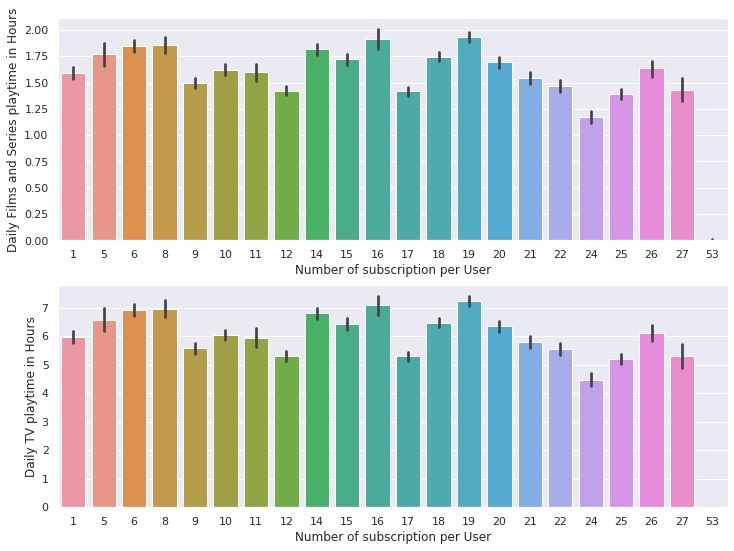

In [8]:
sns.set(font_scale=1)

fig = plt.subplots(figsize=(12,9))

plt.subplot(2,1,1)
ax = sns.barplot(cleaned_activity['details_subscription'],cleaned_activity['vod_playtime']/(60*60*24))
plt.xlabel("Number of subscription per User")
plt.ylabel("Daily Films and Series playtime in Hours")
plt.subplot(2,1,2)
ax = sns.barplot(cleaned_activity['details_subscription'],cleaned_activity['tv_playtime']/(60*60*24))
plt.xlabel("Number of subscription per User")
plt.ylabel("Daily TV playtime in Hours")



Text(0.5, 0, 'Daily Films and Series playtime in hours')

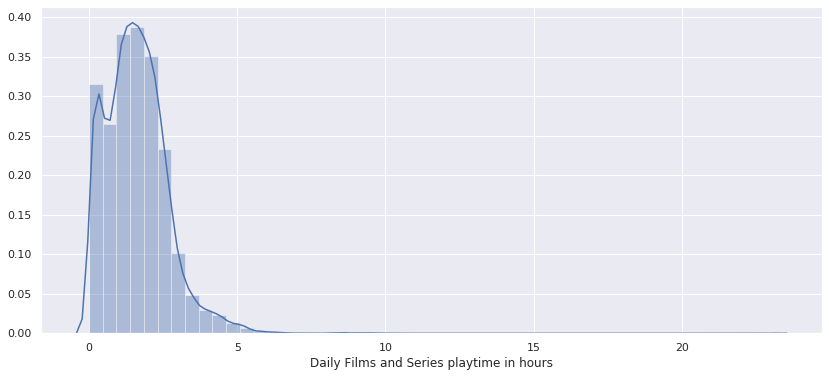

In [9]:
plt.subplots(figsize=(14,6))
ax = sns.distplot(cleaned_activity['vod_playtime']/(60*60*24))
plt.xlabel('Daily Films and Series playtime in hours')

Check all these who have daily greater than 5

In [10]:
extremes = cleaned_activity[(cleaned_activity['vod_playtime']/(60*60*24))>5]

Data exploratory analysis on the extremes

Text(0, 0.5, 'Daily VOD playtime in Hours')

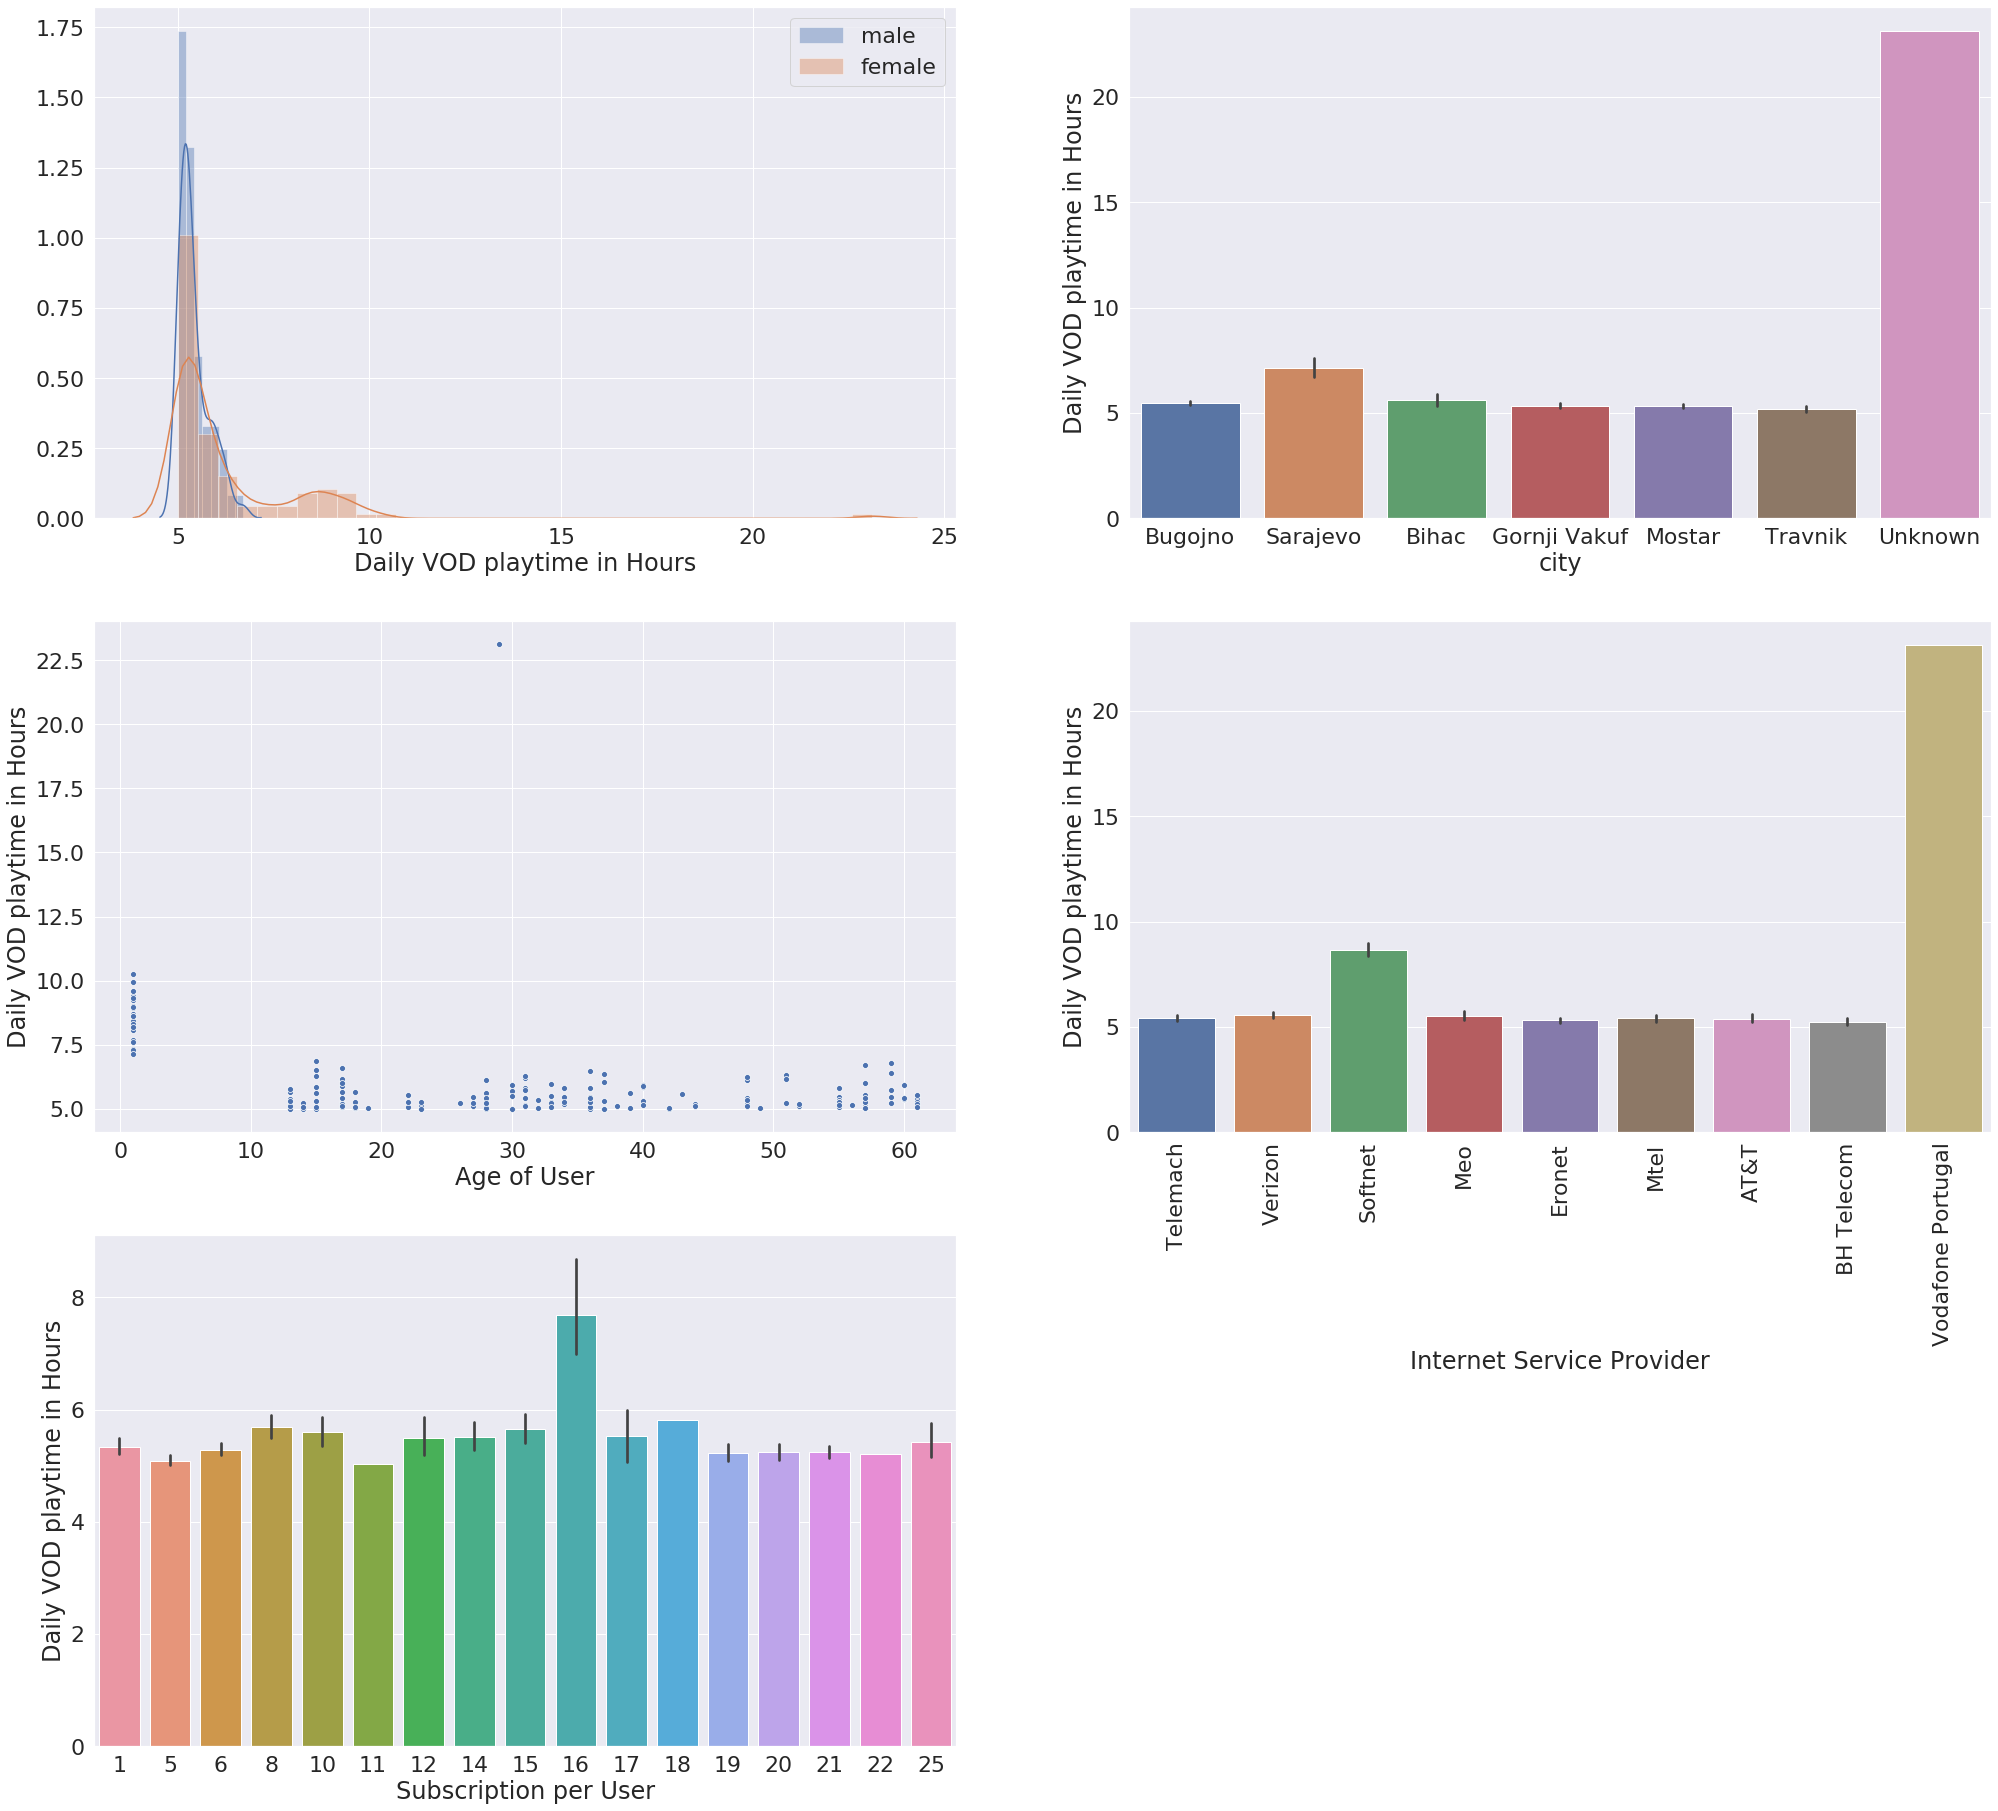

In [11]:
sns.set(font_scale=2)        #set font size
plt.subplots(figsize=(34,32))   #set figure size

plt.subplot(3,2,1)            #first subplot
ax = sns.distplot(a=extremes['vod_playtime'][extremes['details_sex']=='m']/(60*60*24))    #vod playtime dist for males
ax1 = sns.distplot(a=extremes['vod_playtime'][extremes['details_sex']=='f']/(60*60*24))  #vod playtime dist for females
ax.legend(['male','female'])            #adding legend
plt.xlabel("Daily VOD playtime in Hours")    #adding label for x axis


plt.subplot(3,2,2) #second subplot
sns.barplot(x=extremes['city'],y=extremes['vod_playtime']/(60*60*24))  #bar plot of vod playtime per city
plt.ylabel("Daily VOD playtime in Hours")   #label for y axis

plt.subplot(3,2,3)  #third subplot
sns.scatterplot(x=extremes['details_age'],y=extremes['vod_playtime']/(60*60*24)) #scatter plot of vod playtime by age
plt.xlabel('Age of User')  #label for x axis
plt.ylabel("Daily VOD playtime in Hours")  #label for y axis

plt.subplot(3,2,4) #fourth subplot
ax2 = sns.barplot(x=extremes['isp'],y=extremes['vod_playtime']/(60*60*24))   #bar plot of vod playtime by isp
labels = [item.get_text() for item in ax2.get_xticklabels()]  #getting original tick labels
labels[-1] = 'Vodafone Portugal'   #changing last label to make it shorter
ax2.set_xticklabels(labels)  # setting x tick labels
plt.xticks(rotation='vertical') #rotate x tick labels 
plt.xlabel('Internet Service Provider')  #set x label
plt.ylabel("Daily VOD playtime in Hours") #set y label

plt.subplot(3,2,5)
sns.barplot(x=extremes['details_subscription'],y=extremes['vod_playtime']/(60*60*24))
plt.xlabel("Subscription per User")
plt.ylabel("Daily VOD playtime in Hours")

Check the rows with the value for city 'Unknown'

In [12]:
extremes[extremes['city']=='Unknown'] 

,Unnamed: 0,Unnamed: 0.1,_id,city,clicks,country,device_model,device_type,isp,login_count,purchases_count,subscribers,time,tv_l5min,tv_playtime,user_agent,vod_l5min,vod_playtime,details_acc,details_age,details_app_ver,details_clicks,details_login_count,details_profile,details_purchases_count,details_sex,details_subscribers,details_subscription,details_tv_l5min,details_tv_playtime,details_vod_l5min,details_vod_playtime
18838,19011,19011,5db2573379ff9625cdecff29,Unknown,1,Portugal,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6...,web,Vodafone Portugal - Communicacoes Pessoais S.A.,0,0,1,2019-10-24T00:00:00.000Z,0,0,Mozilla/5.0,1,1.997767e+06,72019,29.0,2.29.1,1,0,317977,0,f,1,16,0,0,1,1.997767e+06


Droping these rows

In [13]:
extremes = extremes.drop(index=extremes[extremes['city']=='Unknown'].index) 

In [14]:
extremes = extremes.drop(extremes[extremes['isp']=='Vodafone Portugal - Communicacoes Pessoais S.A.'].index)

Data exploratory analysis on the modified extremes

Text(0, 0.5, 'Daily VOD playtime in Hours')

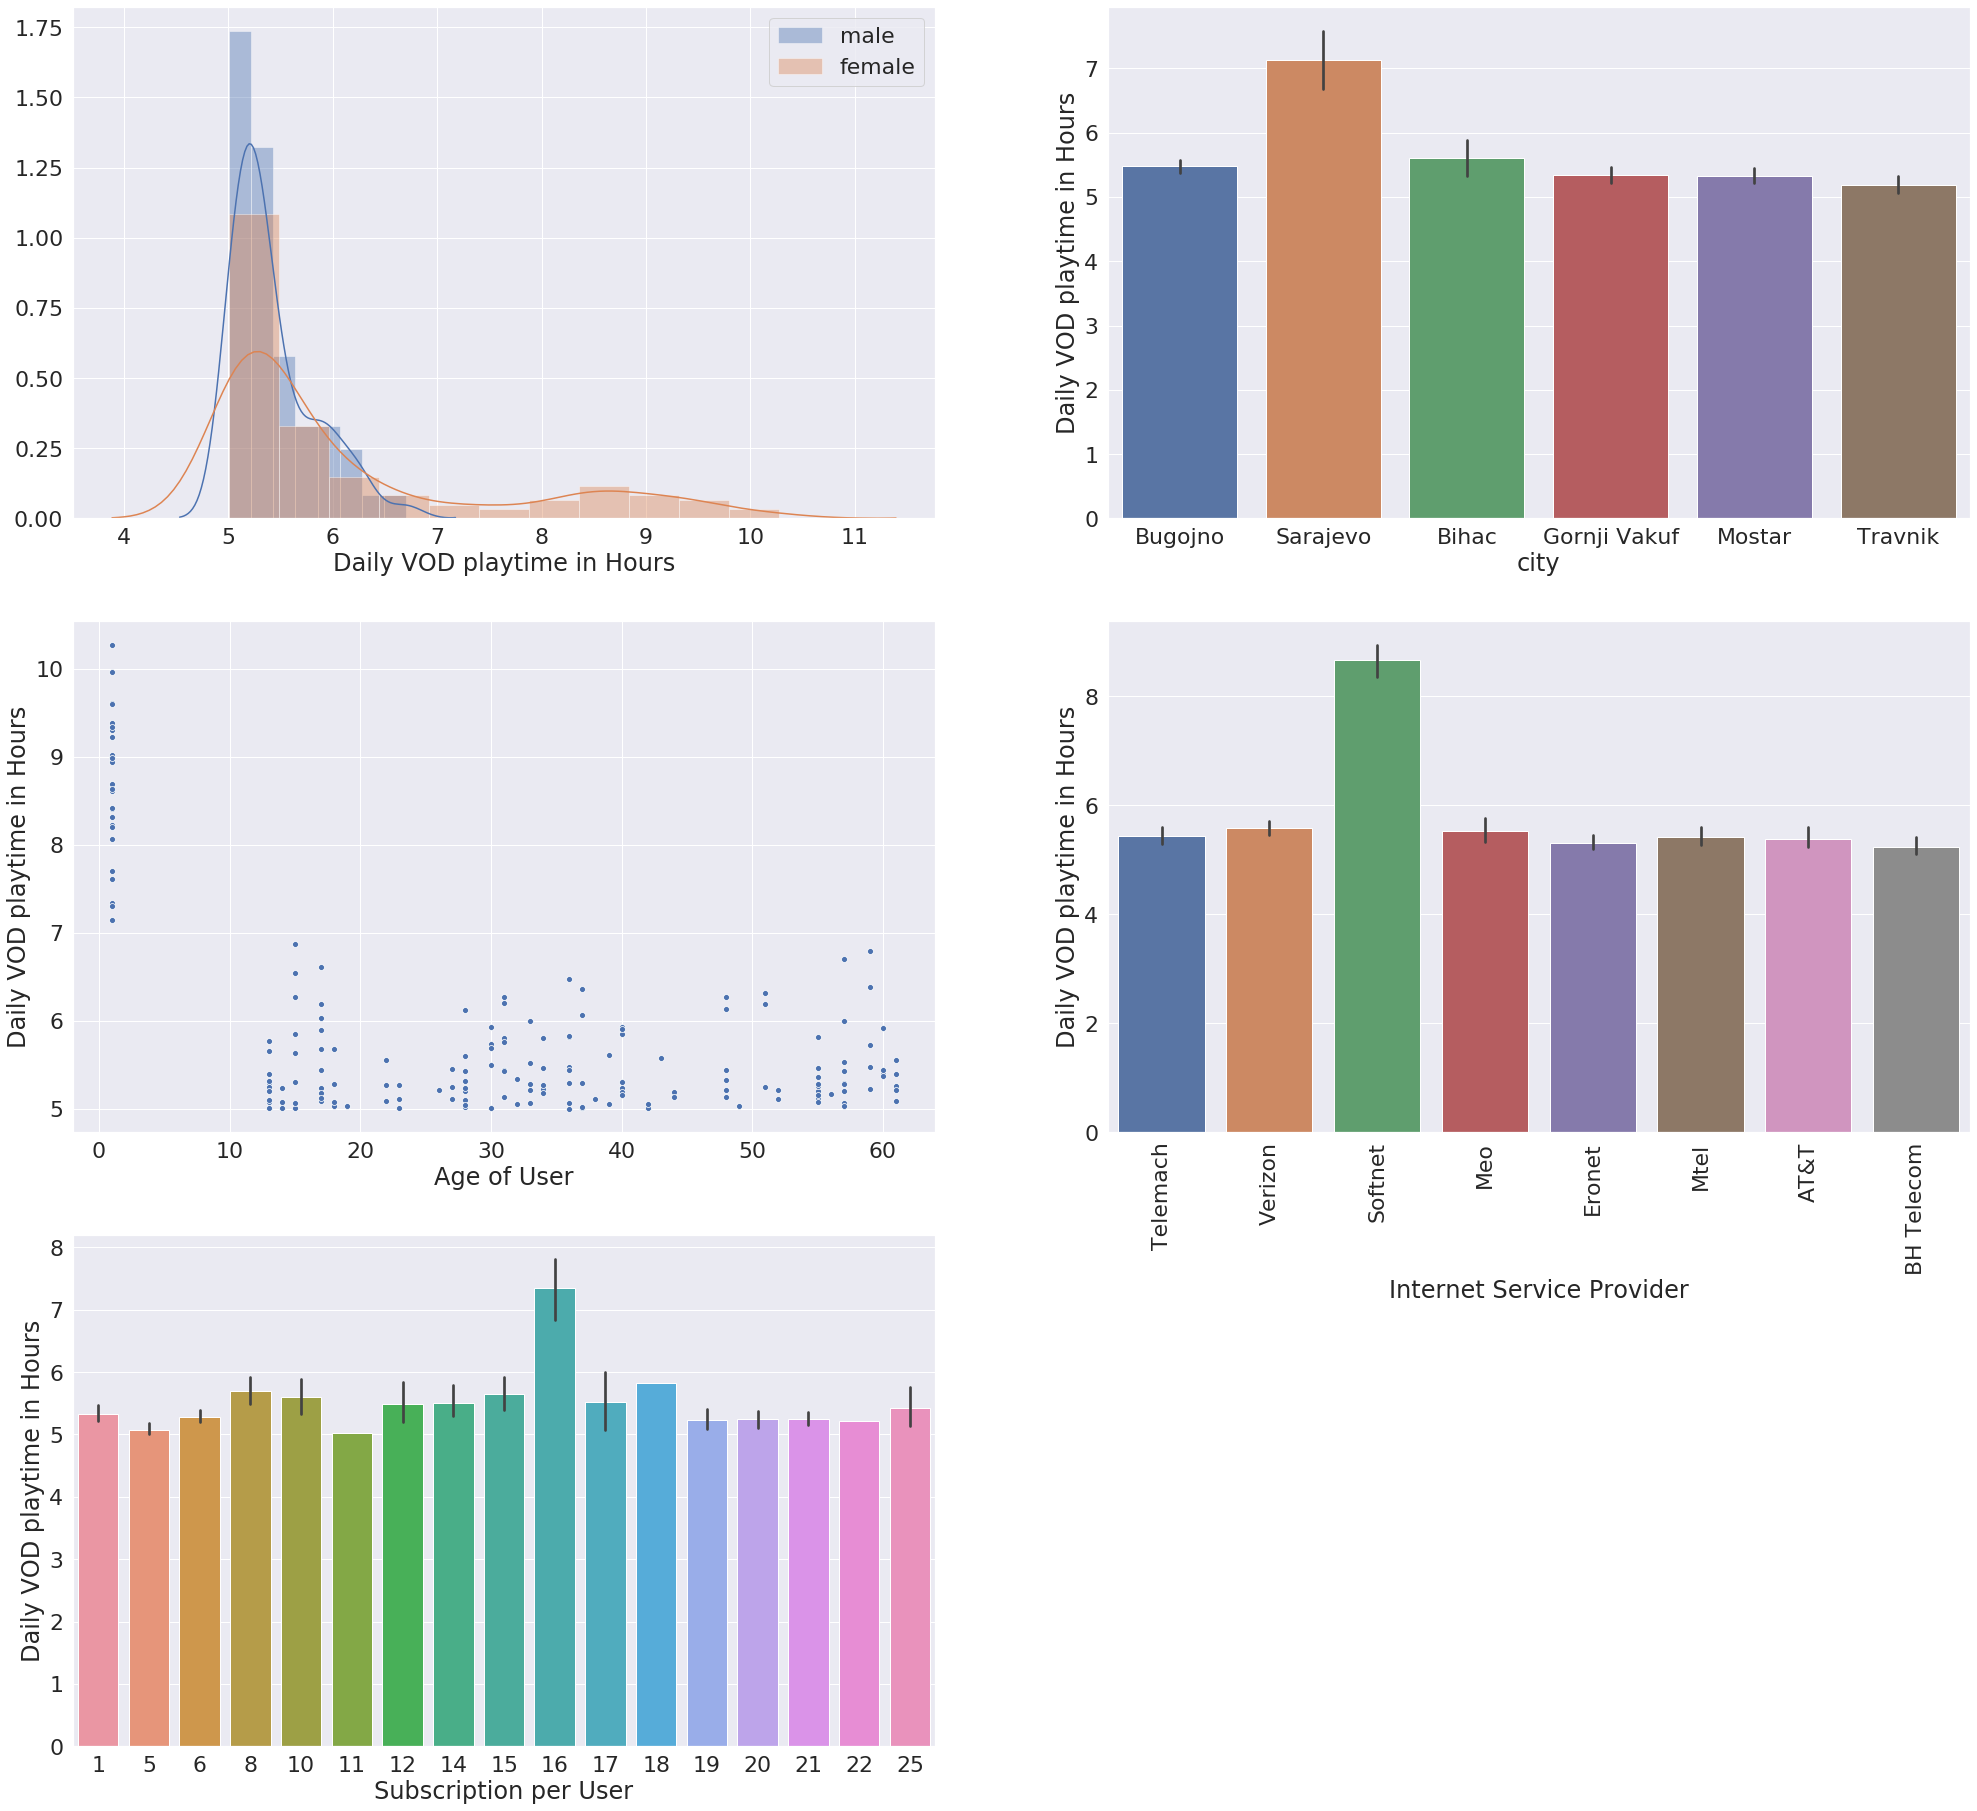

In [15]:
sns.set(font_scale=2)
plt.subplots(figsize=(34,32))

plt.subplot(3,2,1)
ax = sns.distplot(a=extremes['vod_playtime'][extremes['details_sex']=='m']/(60*60*24))
ax1 = sns.distplot(a=extremes['vod_playtime'][extremes['details_sex']=='f']/(60*60*24))
ax.legend(['male','female'])
plt.xlabel("Daily VOD playtime in Hours")
#ax.axes.set_ylim(4,10)

plt.subplot(3,2,2)
sns.barplot(x=extremes['city'],y=extremes['vod_playtime']/(60*60*24))
plt.ylabel("Daily VOD playtime in Hours")

plt.subplot(3,2,3)
sns.scatterplot(x=extremes['details_age'],y=extremes['vod_playtime']/(60*60*24))
plt.xlabel('Age of User')
plt.ylabel("Daily VOD playtime in Hours")

plt.subplot(3,2,4)
ax2 = sns.barplot(x=extremes['isp'],y=extremes['vod_playtime']/(60*60*24))
plt.xticks(rotation='vertical')
plt.xlabel('Internet Service Provider')
plt.ylabel("Daily VOD playtime in Hours")

plt.subplot(3,2,5)
sns.barplot(x=extremes['details_subscription'],y=extremes['vod_playtime']/(60*60*24))
plt.xlabel("Subscription per User")
plt.ylabel("Daily VOD playtime in Hours")

In [16]:
cleaned_activity = cleaned_activity.drop(index=cleaned_activity[cleaned_activity['city']=='Unknown'].index)
cleaned_activity = cleaned_activity.drop(
    cleaned_activity[cleaned_activity['isp']=='Vodafone Portugal - Communicacoes Pessoais S.A.'].index)

Text(0.5, 0, 'Daily VOD playtime in hours')

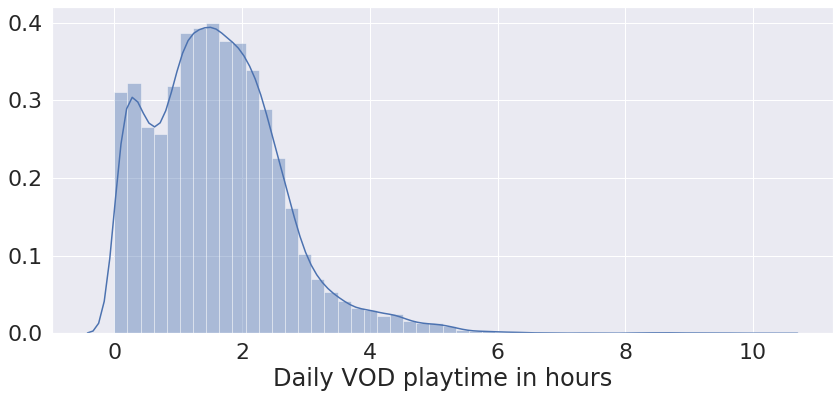

In [17]:
plt.subplots(figsize=(14,6))
ax = sns.distplot(cleaned_activity['vod_playtime']/(60*60*24))
plt.xlabel('Daily VOD playtime in hours')

In [18]:
np.log(cleaned_activity['vod_playtime'])

/home/fuad/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0         8.700348
1         8.896725
2             -inf
3        11.805826
4        11.958508
           ...    
23796    11.901536
23797     7.912789
23798     9.652009
23799    11.225843
23800    12.440951
Name: vod_playtime, Length: 23787, dtype: float64

Creating a crosstab

In [19]:
vod_playtime = pd.DataFrame()   #create new datafreame
vod_playtime['sex'] = cleaned_activity['details_sex']   #copy the gender column into new dataframe
vod_playtime['vod_categories'] = pd.cut(x=cleaned_activity['vod_playtime']/(60*60*24),#vod playtime per hours to be cut
                                        bins=[0,2.4,float('Inf')],  #select breaking points
                                        labels=['less than 2.4','greater then 2.4'])  #label the categories
vod_playtime = vod_playtime.dropna() #drop NaN values if any
cross_table = pd.crosstab(vod_playtime['vod_categories'],  #create croos table 
                         vod_playtime['sex']
                         )
print(cross_table)  #print cross table

sex                  f     m
vod_categories              
less than 2.4     9786  9424
greater then 2.4  2409  2087


Importing a package for statistics

In [22]:
import scipy.stats as stats

Fisher test 

In [23]:
oddsratio1, pvalue1 = stats.fisher_exact(cross_table,alternative='two-sided') 

In [24]:
pvalue1   

0.0014605702133127212

In [26]:
vod_playtime['vod_categories'] = pd.cut(x=cleaned_activity['vod_playtime']/(60*60*24),bins=[0,2.4,float('Inf')],labels=['less than 2.4','greater then 2.4'])

In [27]:
vod_playtime['vod_categories'].unique()

[less than 2.4, greater then 2.4]
Categories (2, object): [less than 2.4 < greater then 2.4]

In [28]:
vod_playtime[vod_playtime['vod_categories'].isna()].size

0

In [29]:
vod_playtime = vod_playtime.dropna()

In [30]:
vod_playtime[vod_playtime['vod_categories'].isna()].size

0

In [31]:
cross_table = pd.crosstab(vod_playtime['vod_categories'],
                         vod_playtime['sex']
                         )

In [32]:
print(cross_table)

sex                  f     m
vod_categories              
less than 2.4     9786  9424
greater then 2.4  2409  2087


In [33]:
cross_table2 = pd.crosstab(vod_playtime['sex'],
                         vod_playtime['vod_categories']
                         )

In [34]:
print(cross_table2)

vod_categories  less than 2.4  greater then 2.4
sex                                            
f                        9786              2409
m                        9424              2087


In [35]:
oddsratio1, pvalue1 = stats.fisher_exact(cross_table,alternative='two-sided')

In [36]:
pvalue1

0.0014605702133127212

In [37]:
oddsratio, pvalue = stats.fisher_exact(cross_table,alternative='two-sided')

In [38]:
pvalue

0.0014605702133127212